In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Generación del problema

In [2]:
def get_nodes(n,lim):
    mpositions = np.random.uniform(0,lim,(n,2))
    mdist = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            x1,y1 = mpositions[i,0],mpositions[i,1]
            x2,y2 = mpositions[j,0],mpositions[j,1]
            mdist[i,j] = mdist[j,i] = np.sqrt( (x1-x2)**2 + (y1-y2)**2 )
    nnames = [chr(x) for x in range(ord('A'),ord('Z')+1)]
    nnames = nnames[:n]
    ndict = {n:i for i,n in enumerate(nnames)}
    return nnames, mpositions, mdist, ndict
nnames, mpositions, mdist, ndict = get_nodes(5,100)

# Algoritmo genético

In [3]:
NNodes = 10
lim = 100
nnames, mpositions, mdist, ndict = get_nodes(NNodes,lim)

In [4]:
def fitness_individual(ind,mdist,ndict):
    d = 0
    for i in range(len(ind)-1):
        n1 = ind[i]
        n2 = ind[i+1]
        d += mdist[ ndict[n1],ndict[n2] ]
    return d

In [5]:
def fitness_population(population,mdist,ndict):
    N = len(population)
    fitness = np.zeros((N))
    for i in range(N):
        fitness[i] = fitness_individual(population[i,:],mdist,ndict)
    return fitness

In [6]:
def initial_population(N,nnames):
    population = np.zeros( (N,len(nnames)+1),'str')
    population[:,0] = nnames[0]
    population[:,-1] = nnames[0]
    for i in range(N):
        population[i,1:-1] = np.random.permutation( nnames[1:])
    return population

In [7]:
def draw_elite(mpositions,nnames,ndict,elite):
    plt.figure()
    plt.scatter(mpositions[:,0],mpositions[:,1])
    for i in range(len(nnames)):
        plt.text(mpositions[i,0],mpositions[i,1],nnames[i])
    for i in range(len(elite)-1):
        n1, n2 = elite[i] , elite[i+1]
        i1, i2 = ndict[n1], ndict[n2]
        x1, y1 = mpositions[i1,0], mpositions[i1,1]
        x2, y2 = mpositions[i2,0], mpositions[i2,1]
        plt.plot( [x1,x2],[y1,y2] )
    plt.show()

In [8]:
def parent_selection_tournament(population,fitness):
    popsize = len(population)
    i1, i2 = np.random.choice(popsize,2)
    if fitness[i1] <= fitness[i2]:
        return population[i1,:]
    else:
        return population[i2,:]

In [9]:
def crossover(parent1,parent2,nnames):
    #print(parent1)
    #print(parent2)
    pc = np.random.randint(1,len(parent1)-2)
    child = np.concatenate((parent1[:pc], parent2[pc:]))
    #print(child)
    snodes = set(nnames)
    schild = set(child)
    repeated = set(parent1[1:pc]).intersection( set(parent2[pc:-1]) )
    missing = snodes.difference(schild)
    #print( 'faltan',missing)
    #print( 'repiten',repeated)
    if len(repeated)>0:
        for i in range(len(child)):
            if child[i] in repeated:
                repeated.remove(child[i])
                child[i] = missing.pop()          
    return child  

In [10]:
def mutation(individual):
    while True:
        pm1 = np.random.randint(1,len(individual)-1)
        pm2 = np.random.randint(1,len(individual)-1)
        if pm1 != pm2: break
    individual[pm1], individual[pm2] = individual[pm2], individual[pm1]
    return individual

In [11]:
def crossover_population(Pr,population,fitness,nnames):
    newpopulation = np.zeros_like(population)
    
    for i in range(len(population)):
        if np.random.rand() <= Pr:
            parent1 = parent_selection_tournament(population,fitness)
            parent2 = parent_selection_tournament(population,fitness)
            child = crossover(parent1,parent2,nnames)
            newpopulation[i,:] = np.copy(child)
        else:
            parent = parent_selection_tournament(population,fitness)
            newpopulation[i,:] = np.copy(parent)
    return newpopulation

In [12]:
def mutation_population(Pm,population):
    for i in range(len(population)):
        if np.random.rand() <= Pm:
            population[i,:] = mutation(population[i,:])
    return population

In [13]:
def get_elite(population,fitness,elite=None,fitelite=None):
    idx = np.argsort(fitness)
    population = population[idx,:]
    fitness = fitness[idx]

    if elite is None:
        elite = np.copy(population[0,:])
        fitelite = fitness[0]
        return elite,fitelite
    
    if fitness[0] < fitelite:
        elite = np.copy(population[0,:])
        fitelite = fitness[0]
        return elite,fitelite

    return elite,fitelite

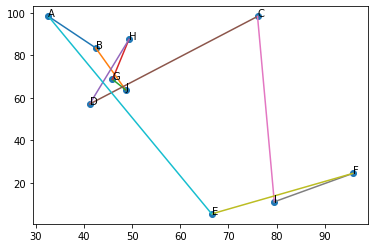

Generación 0 fitness elite: 390.7075134436155


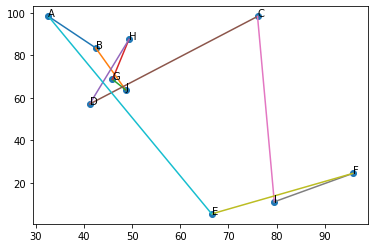

Generación 1 fitness elite: 390.7075134436155
Generación 2 fitness elite: 365.630852954789
Generación 3 fitness elite: 354.474562855313
Generación 4 fitness elite: 318.4926126708284
Generación 5 fitness elite: 318.4926126708284
Generación 6 fitness elite: 318.4926126708284
Generación 7 fitness elite: 318.4926126708284
Generación 8 fitness elite: 318.4926126708284
Generación 9 fitness elite: 305.4780200380154
Generación 10 fitness elite: 305.4780200380154
Generación 11 fitness elite: 305.4780200380154
Generación 12 fitness elite: 305.4780200380154
Generación 13 fitness elite: 305.4780200380154
Generación 14 fitness elite: 305.4780200380154
Generación 15 fitness elite: 305.4780200380154
Generación 16 fitness elite: 305.4780200380154
Generación 17 fitness elite: 305.4780200380154
Generación 18 fitness elite: 305.4780200380154
Generación 19 fitness elite: 305.0006172153428
Generación 20 fitness elite: 302.12135266969335
Generación 21 fitness elite: 302.12135266969335
Generación 22 fitness 

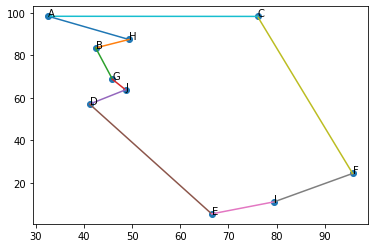

Generación 101 fitness elite: 271.3749093580043
Generación 102 fitness elite: 271.3749093580043
Generación 103 fitness elite: 271.3749093580043
Generación 104 fitness elite: 271.3749093580043
Generación 105 fitness elite: 271.3749093580043
Generación 106 fitness elite: 271.3749093580043
Generación 107 fitness elite: 271.3749093580043
Generación 108 fitness elite: 271.3749093580043
Generación 109 fitness elite: 271.3749093580043
Generación 110 fitness elite: 271.3749093580043
Generación 111 fitness elite: 271.3749093580043
Generación 112 fitness elite: 271.3749093580043
Generación 113 fitness elite: 271.3749093580043
Generación 114 fitness elite: 271.3749093580043
Generación 115 fitness elite: 271.3749093580043
Generación 116 fitness elite: 271.3749093580043
Generación 117 fitness elite: 271.3749093580043
Generación 118 fitness elite: 271.3749093580043
Generación 119 fitness elite: 271.3749093580043
Generación 120 fitness elite: 271.3749093580043
Generación 121 fitness elite: 271.374909

In [14]:
# Algoritmo genético

N = 30
G = 200
Pr = 0.7
Pm = 0.1

population = initial_population(N,nnames)
fitness = fitness_population(population,mdist,ndict)
elite,fitelite = get_elite(population,fitness)
draw_elite(mpositions,nnames,ndict,elite)

for g in range(G):
    print('Generación',g, 'fitness elite:',fitelite)
    if g%100 == 0:
        draw_elite(mpositions,nnames,ndict,elite)
    
    population = crossover_population(Pr,population,fitness,nnames)
    population = mutation_population(Pm,population)
    
    fitness = fitness_population(population,mdist,ndict) 
    elite,fitelite = get_elite(population,fitness,elite,fitelite)
    
